In [3]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to

In [4]:

killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [5]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

killings.rename(columns={'lawenforcementagency':'agency', 'raceethnicity':'race'}, inplace=True)

In [6]:
# 2. Show the count of missing values in each column

killings.isnull().sum() 

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [7]:
# 3. replace each null value in the dataframe with the string "Unknown"

killings.fillna(value= 'Unknown') 
killings = pd.read_csv('./data/police-killings.csv', na_filter=False)
killings.isnull().sum() 

Unnamed: 0              0
name                    0
age                     0
gender                  0
raceethnicity           0
month                   0
day                     0
year                    0
streetaddress           0
city                    0
state                   0
lawenforcementagency    0
cause                   0
armed                   0
county_income           0
dtype: int64

In [8]:
killings.describe()

,Unnamed: 0,age,day,year,county_income
count,467.000000,467.000000,467.000000,467.0,467.000000
mean,233.000000,37.351178,15.830835,2015.0,52527.331906
std,134.955548,12.944617,8.658970,0.0,12948.263811
min,0.000000,16.000000,1.000000,2015.0,22545.000000
25%,116.500000,28.000000,8.000000,2015.0,43804.000000
50%,233.000000,35.000000,16.000000,2015.0,50856.000000
75%,349.500000,45.000000,23.000000,2015.0,56832.000000
max,466.000000,87.000000,31.000000,2015.0,110292.000000


In [9]:
# 4. How many killings were there so far in 2015?

killings.year.value_counts()

2015    467
Name: year, dtype: int64

In [10]:
# 5. Of all killings, how many were male and how many female?
killings.gender.value_counts()

Male      445
Female     22
Name: gender, dtype: int64

In [11]:
# 6. How many killings were of unarmed people?

killings[killings.armed =='No'].armed.count()

#killings.armed.value_counts()


102

In [12]:
# 7. What percentage of all killings were unarmed?

killings[killings.armed =='No'].armed.count()/killings.count()*100

Unnamed: 0              21.841542
name                    21.841542
age                     21.841542
gender                  21.841542
raceethnicity           21.841542
month                   21.841542
day                     21.841542
year                    21.841542
streetaddress           21.841542
city                    21.841542
state                   21.841542
lawenforcementagency    21.841542
cause                   21.841542
armed                   21.841542
county_income           21.841542
dtype: float64

In [13]:
# 8. What are the 5 states with the most killings?

killings.state.value_counts().head()


CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [14]:
# 9. Show a value counts of deaths for each race

killings.raceethnicity.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

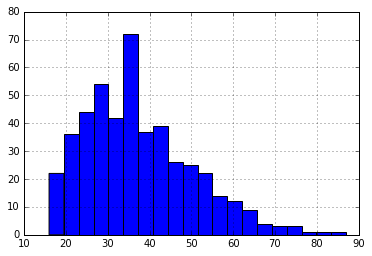

In [15]:
# 10. Display a histogram of ages of all killings
import matplotlib.pyplot as plt
%matplotlib inline
killings.age.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119167210>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1196ae190>]], dtype=object)

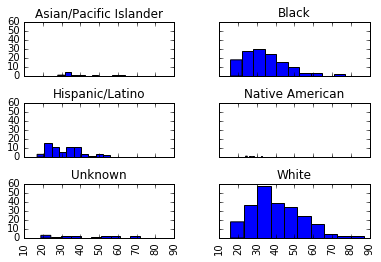

In [16]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.raceethnicity, sharex = True, sharey=True)


In [17]:
# 12. What is the average age of death by race?
killings.groupby('raceethnicity').age.mean()


raceethnicity
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

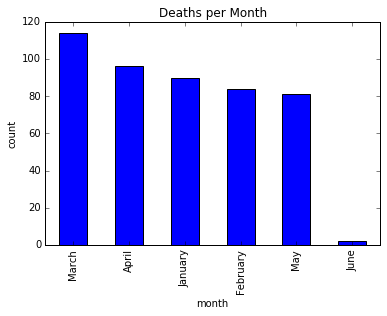

In [18]:
# 13. Show a bar chart with counts of deaths every month

killings.month.value_counts().plot(kind='bar', title='Deaths per Month')
plt.xlabel('month')
plt.ylabel('count')


In [19]:
###################
### Less Morbid ###
###################

In [20]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [21]:
# 1. Delete the columns (employed_full_time_year_round, major_code)

majors.drop(majors.columns[[1,6]], axis = 1, inplace=True)
majors


,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0
5,5,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,2070,0.031791,50000,35000,75000.0
6,6,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,264,0.050867,63000,39400,88000.0
7,7,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,261,0.039230,52000,35000,75000.0
8,8,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,4736,0.051290,52000,38000,75000.0
9,9,FORESTRY,Agriculture & Natural Resources,69447,48228,2144,0.042563,58000,40500,80000.0


In [22]:
# 2. Show the cout of missing values in each column
majors.isnull().sum() 

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [49]:
# 3. What are the top 10 highest paying majors?
dataframe = majors[['Major' , 'Median']].tail(10)
dataframe

        #majors.sort_index(by='Median').tail(10)
# majors.groupby('Major').Median.mean().sort_index(by='Major') < why does this not work?

,Major,Median
163,BUSINESS ECONOMICS,65000
164,MARKETING AND MARKETING RESEARCH,56000
165,FINANCE,65000
166,HUMAN RESOURCES AND PERSONNEL MANAGEMENT,54000
167,INTERNATIONAL BUSINESS,54000
168,HOSPITALITY MANAGEMENT,49000
169,MANAGEMENT INFORMATION SYSTEMS AND STATISTICS,72000
170,MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION,53000
171,HISTORY,50000
172,UNITED STATES HISTORY,50000


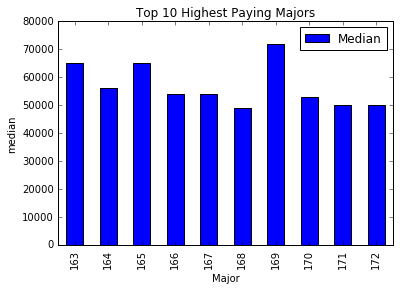

In [52]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!


dataframe.plot(kind='bar', title='Top 10 Highest Paying Majors')
plt.xlabel('Major')
plt.ylabel('median')


# 3. What are the top 10 highest paying majors?
#majors.sort_index(by='Median').tail(10)

In [25]:
# 5. What is the average median salary for each major category?

majors.groupby('Major').Median.mean()

Major
ACCOUNTING                                       65000
ACTUARIAL SCIENCE                                72000
ADVERTISING AND PUBLIC RELATIONS                 50000
AEROSPACE ENGINEERING                            80000
AGRICULTURAL ECONOMICS                           63000
AGRICULTURE PRODUCTION AND MANAGEMENT            54000
ANIMAL SCIENCES                                  46000
ANTHROPOLOGY AND ARCHEOLOGY                      43000
APPLIED MATHEMATICS                              70000
ARCHITECTURAL ENGINEERING                        78000
ARCHITECTURE                                     63000
AREA ETHNIC AND CIVILIZATION STUDIES             46000
ART AND MUSIC EDUCATION                          42600
ART HISTORY AND CRITICISM                        44500
ASTRONOMY AND ASTROPHYSICS                       80000
ATMOSPHERIC SCIENCES AND METEOROLOGY             60000
BIOCHEMICAL SCIENCES                             53000
BIOLOGICAL ENGINEERING                           62000
BIOL

In [26]:
# 6. Show only the top 5 paying major categories

majors.groupby('Major').Median.mean().head()

Major
ACCOUNTING                          65000
ACTUARIAL SCIENCE                   72000
ADVERTISING AND PUBLIC RELATIONS    50000
AEROSPACE ENGINEERING               80000
AGRICULTURAL ECONOMICS              63000
Name: Median, dtype: int64

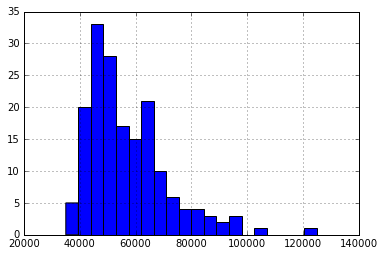

In [27]:
# 7. Plot a histogram of the distribution of median salaries

import matplotlib.pyplot as plt
%matplotlib inline
majors.Median.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113caa410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c0730d0>]], dtype=object)

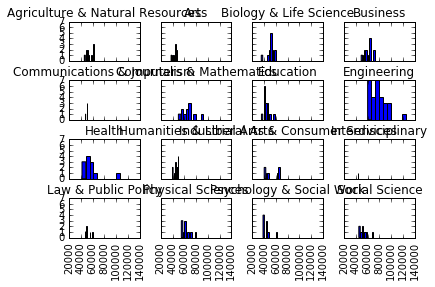

In [28]:
# 8. Plot a histogram of the distribution of median salaries by major category

majors.Median.hist(by=majors.Major_category, sharex = True, sharey=True)


In [29]:
# 9. What are the top 10 most UNemployed majors?

majors.sort_index(by='Unemployment_rate', ascending = False).head(10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
146,146,MISCELLANEOUS FINE ARTS,Arts,8511,6431,1190,0.156147,45000,30000,60000.0
116,116,CLINICAL PSYCHOLOGY,Psychology & Social Work,7638,5128,587,0.102712,45000,26100,62000.0
93,93,MILITARY TECHNOLOGIES,Industrial Arts & Consumer Services,4315,1650,187,0.101796,64000,39750,90000.0
27,27,SCHOOL STUDENT COUNSELING,Education,2396,1492,169,0.101746,41000,33200,50000.0
77,77,LIBRARY SCIENCE,Education,16193,7091,743,0.094843,40000,30000,55000.0
141,141,VISUAL AND PERFORMING ARTS,Arts,55141,41098,4297,0.094658,40000,27000,59000.0
19,19,COMPUTER PROGRAMMING AND DATA PROCESSING,Computers & Mathematics,29317,22828,2265,0.090264,60000,40000,85000.0
119,119,SOCIAL PSYCHOLOGY,Psychology & Social Work,10871,6897,660,0.087336,47000,35000,70000.0
104,104,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,4700,3400,320,0.086022,80000,40000,106000.0
11,11,ARCHITECTURE,Engineering,294692,216770,20394,0.085991,63000,40400,93500.0


In [30]:
# What are the unemployment rates?

unemployed / total

NameError: name 'unemployed' is not defined

In [ ]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

majors[['Major_category', 'Unemployment_rate']].sort_index(by='Unemployment_rate', ascending = False).head(10)

In [32]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

majors['sample_employment_rate'] = majors.Employed / majors.Total
majors

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738
5,5,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,2070,0.031791,50000,35000,75000.0,0.793902
6,6,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,264,0.050867,63000,39400,88000.0,0.747950
7,7,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,261,0.039230,52000,35000,75000.0,0.747690
8,8,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,4736,0.051290,52000,38000,75000.0,0.825608
9,9,FORESTRY,Agriculture & Natural Resources,69447,48228,2144,0.042563,58000,40500,80000.0,0.694458


In [33]:
# 12. Create a "sample_unemployment_rate" colun
# this column should be 1 - "sample_employment_rate"

majors['sample_unemployment_rate'] = 1- majors.sample_employment_rate
majors

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate,sample_unemployment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225,0.295775
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338,0.193662
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173,0.224827
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948,0.216052
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738,0.288262
5,5,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,2070,0.031791,50000,35000,75000.0,0.793902,0.206098
6,6,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,264,0.050867,63000,39400,88000.0,0.747950,0.252050
7,7,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,261,0.039230,52000,35000,75000.0,0.747690,0.252310
8,8,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,4736,0.051290,52000,38000,75000.0,0.825608,0.174392
9,9,FORESTRY,Agriculture & Natural Resources,69447,48228,2144,0.042563,58000,40500,80000.0,0.694458,0.305542


In [34]:
###################
### More Tasty ###
###################

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [54]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [55]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled


In [56]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [61]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

#this just puts them all in the same row
#frames = [businesses, inspections, violations]
#result = pd.concat(frames)
#result


merge1 = pd.merge(inspections, violations, how='left', on=['date' , 'business_id'], left_on=None, right_on=None,
      left_index=False, right_index=False, sort=True,
      suffixes=('_x', '_y'), copy=True, indicator=False)

result = pd.merge(merge1, businesses, how='left', on= 'business_id', left_on=None, right_on=None,
      left_index=False, right_index=False, sort=True,
      suffixes=('_x', '_y'), copy=True, indicator=False)



result

,business_id,Score,date,type,ViolationTypeID,risk_category,description,name,address,city,...,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,92.0,20140114,Routine - Unscheduled,103154.0,Low Risk,Unclean or degraded floors walls or ceilings,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,10,92.0,20140114,Routine - Unscheduled,103119.0,Moderate Risk,Inadequate and inaccessible handwashing facili...,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
2,10,92.0,20140114,Routine - Unscheduled,103145.0,Low Risk,Improper storage of equipment utensils or linens,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
3,10,NaN,20140124,Reinspection/Followup,NaN,NaN,NaN,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
4,10,94.0,20140729,Routine - Unscheduled,103129.0,Moderate Risk,Insufficient hot water or running water,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
5,10,94.0,20140729,Routine - Unscheduled,103144.0,Low Risk,Unapproved or unmaintained equipment or utensils,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
6,10,NaN,20140807,Reinspection/Followup,NaN,NaN,NaN,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
7,19,96.0,20130904,Routine - Unscheduled,103133.0,Moderate Risk,Foods not protected from contamination,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,...,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
8,19,94.0,20140214,Routine - Unscheduled,103156.0,Low Risk,Permit license or inspection report not posted,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,...,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
9,19,94.0,20140214,Routine - Unscheduled,103124.0,Moderate Risk,Inadequately cleaned or sanitized food contact...,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,...,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109


In [62]:
# 2 Which ten business have had the most inspections?

result.business_id.value_counts().head(10)

10238    69
71385    66
75139    66
2945     62
77693    62
67154    60
64176    59
3151     59
63082    58
489      55
Name: business_id, dtype: int64

In [63]:
# 3 Group and count the inspections by type

result.type.value_counts()

Routine - Unscheduled                42222
Reinspection/Followup                 6043
Complaint                             3155
New Ownership                         2665
New Construction                      1643
Non-inspection site visit             1008
Foodborne Illness Investigation        246
Complaint Reinspection/Followup        168
Structural Inspection                  142
Routine - Scheduled                    100
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: type, dtype: int64

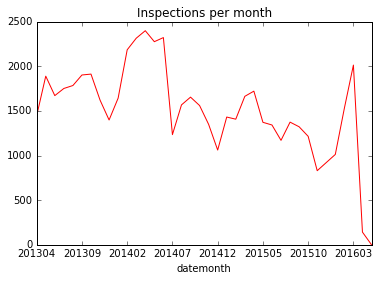

In [68]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap



result['datemonth'] = result['date'].map(lambda x: str(x)[:-2])
result

inspections_per_month = result.groupby('datemonth').date.count()



inspections_per_month.plot(kind='line', 
                        color='r', 
                        linewidth=1, 
                        title='Inspections per month')


In [92]:
# 5 Which zip code contains the most high risk violations?

result.owner_zip.value_counts().head(1)

94110    546
Name: owner_zip, dtype: int64

In [141]:
# 6 If inspection is prompted by a change in restaurant ownership,  (type = New Ownership)
# is the inspection more likely to be categorized as higher or lower risk? (risk_category)


#result[['risk_category','type']][result.type == 'New Ownership'].groupby('risk_category')

result.groupby('risk_category').type.value_counts()



Series([], dtype: int64)

In [ ]:
# 7 Examining the descriptions, what is the most common violation?

In [147]:
# 8 What street has the best (safest) restaurants to dine out at?

result.address.value_counts().order(ascending=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


2101 LOMBARD St                   1
1008 Bush St                      1
5850 GEARY BLVD                   1
1223 TARAVAL St                   1
5336 Geary Blvd                   1
325 La Grande Ave                 1
101 Spear St #A24                 1
1198 Mission St                   1
895 Bush St                       1
1570 Stockton St                  1
501 Broadway St                   1
2521 SCOTT St                     1
44 Tehama St                      1
2084 HAYES St                     1
307 Kearny St                     1
670 Broadway St                   1
327 Kearny St                     1
918 CLEMENT St                    1
400 Guerrero St                   1
1537 Ocean Ave                    1
315 08th Ave                      1
417 Stockton St                   1
151 Noe St                        1
951 Clement St                    1
4800 03rd St #404                 1
1483 Mason St                     1
211 Valencia St                   1
405 Mason St                

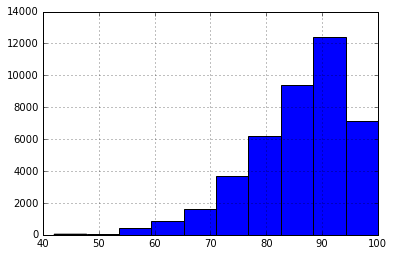

In [69]:
# 9 Create a hist of the scores with 10 bins

result.Score.hist(bins=10)

In [ ]:
# 8 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/